# Credit Card Customer Data Analysis 
### Clustering & Fitting

### About this Dataset

A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.



### Overview:

This analysis focuses on understanding customer behavior and segmenting customers based on their credit card usage data. The dataset contains various features related to credit card limits, number of credit cards, and customer interactions through different channels. The main goals are to cluster customers and predict certain features using classification and regression techniques.

### Steps implemented:
1. Data Loading and Inspection

2. Data Preprocessing

3. Clustering

4. Feature Engineering

5. Classification

6. Regression

7. Visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
# Loading dataset
file_path = 'Credit Card Customer Data.csv'
df = pd.read_csv(file_path)

In [3]:
# Inspection
df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
# missing values
print(df.isnull().sum())

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


- This dataset is clean as it has no missing values

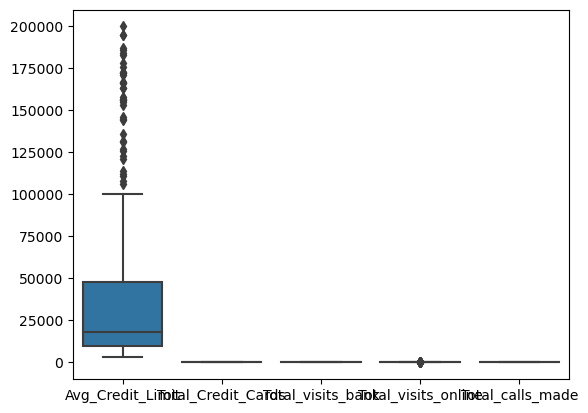

In [5]:
# Plotting to identify outliers
sns.boxplot(data=df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])
plt.show()


- The Average Credit Limit Attrinute haswhiskers as seen above the upper whisker

- This outliers will be handled by using the IQR (Inter Quartile Range) method

In [6]:
# Load dataset
file_path = 'Credit Card Customer Data.csv'
df = pd.read_csv(file_path)

# function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers 
df_cleaned = remove_outliers(df, 'Avg_Credit_Limit')

import warnings
warnings.filterwarnings('ignore')

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('Credit Card Customer Data Cleaned.csv', index=False)

# Verify the first few rows of the cleaned dataset
df_cleaned.head()



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
df_cleaned.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,311.301127,55080.400966,27061.191626,4.452496,2.516908,2.086957,3.745572
std,179.952174,25453.445916,22454.530210,1.955904,1.610987,2.014986,2.870259
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,156.000000,34423.000000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,311.000000,53851.000000,17000.000000,4.000000,2.000000,2.000000,3.000000
75%,466.000000,76492.000000,40000.000000,6.000000,4.000000,3.000000,6.000000
max,657.000000,99596.000000,100000.000000,10.000000,5.000000,15.000000,10.000000


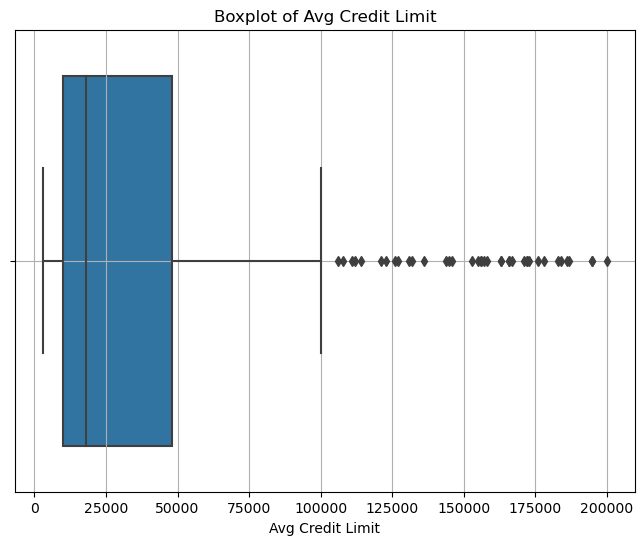

In [8]:
# Plot boxplot to show the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Avg_Credit_Limit'])
plt.title('Boxplot of Avg Credit Limit')
plt.xlabel('Avg Credit Limit')
plt.grid(True)
plt.show()


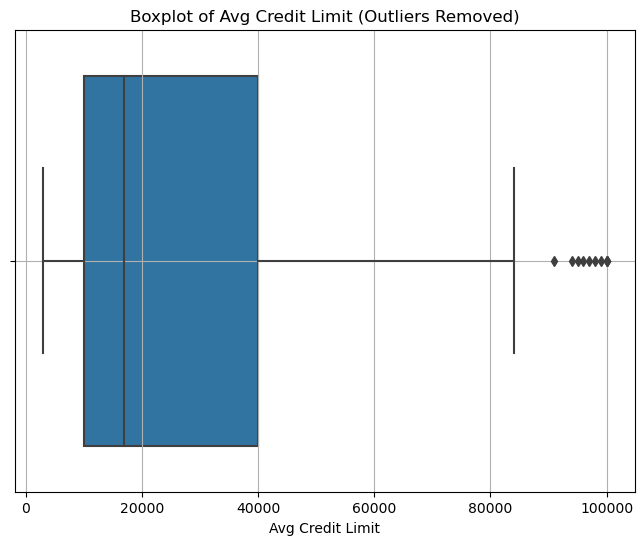

In [9]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Avg_Credit_Limit'
df_cleaned = remove_outliers(df, 'Avg_Credit_Limit')

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('Credit Card Customer Data Cleaned.csv', index=False)

# Plot boxplot of the cleaned data to show that outliers have been removed
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Avg_Credit_Limit'])
plt.title('Boxplot of Avg Credit Limit (Outliers Removed)')
plt.xlabel('Avg Credit Limit')
plt.grid(True)
plt.show()


In [10]:
# Normalization of features
scaler = StandardScaler()
df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']] = scaler.fit_transform(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])


In [11]:
# Elbow Method for GMM using BIC
bic_scores = []
n_components = range(1, 11)

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])
    bic_scores.append(gmm.bic(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]))


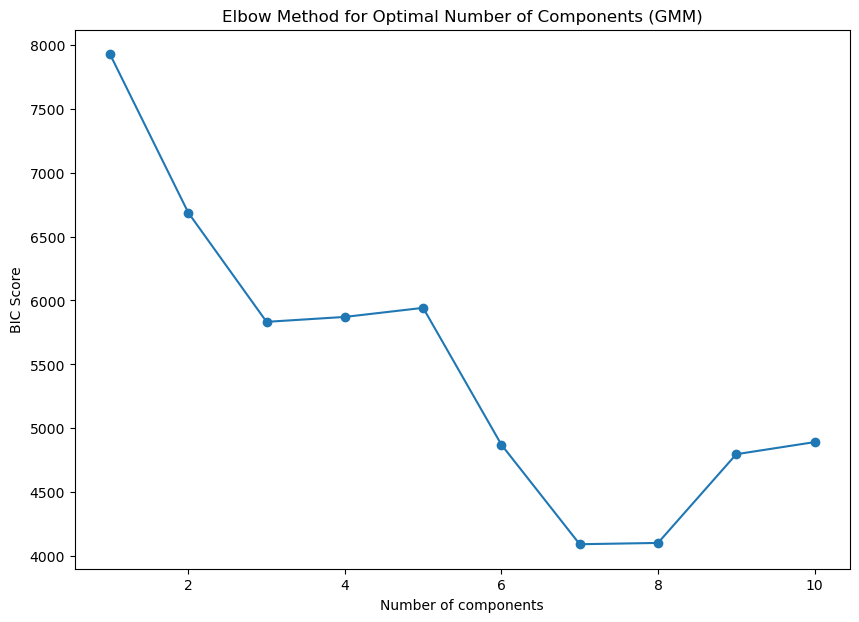

In [12]:
# Plotting the BIC scores
plt.figure(figsize=(10, 7))
plt.plot(n_components, bic_scores, marker='o')
plt.title('Elbow Method for Optimal Number of Components (GMM)')
plt.xlabel('Number of components')
plt.ylabel('BIC Score')
plt.show()


In [13]:
# Gaussian Mixture Model clustering with the optimal number of components (3)
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])


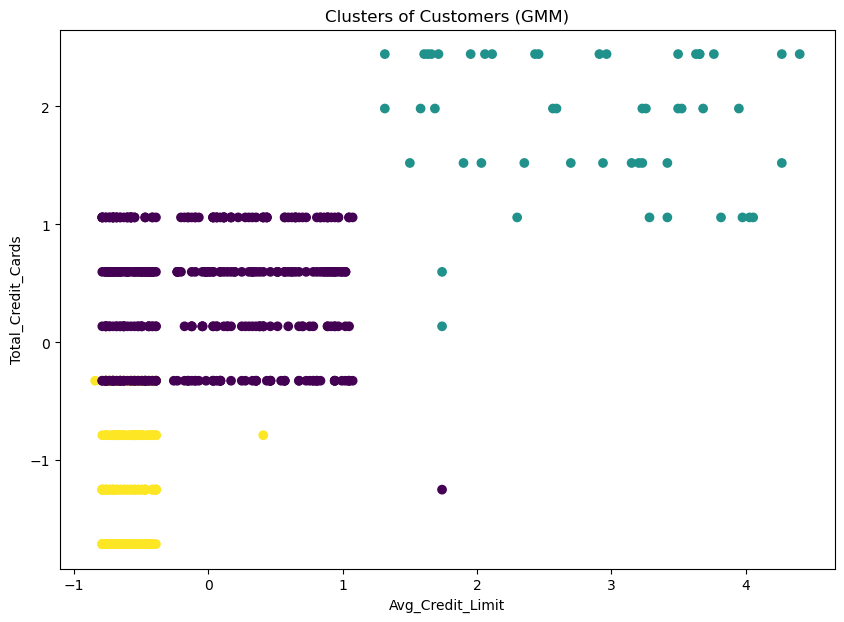

In [14]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'], c=df['GMM_Cluster'], cmap='viridis')
plt.title('Clusters of Customers (GMM)')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.show()


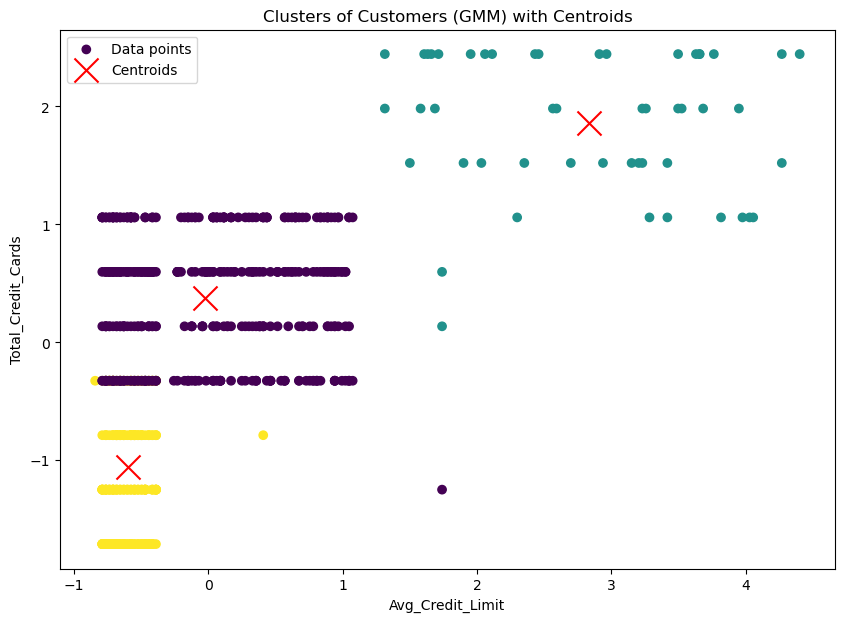

In [15]:
# Visualizing the clusters with centroids
plt.figure(figsize=(10, 7))
plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'], c=df['GMM_Cluster'], cmap='viridis', label='Data points')

# Calculate centroids
centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')

plt.title('Clusters of Customers (GMM) with Centroids')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.legend()
plt.show()

In [16]:
# Derive new features 
df['Interaction_Online_Bank'] = df['Total_visits_online'] * df['Total_visits_bank']


In [17]:

# Classification: Predicting cluster labels
X_class = df[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Interaction_Online_Bank']]
y_class = df['GMM_Cluster']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

svc = SVC()
svc.fit(X_train_class, y_train_class)

y_pred_class = svc.predict(X_test_class)
print(classification_report(y_test_class, y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        49

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        49

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



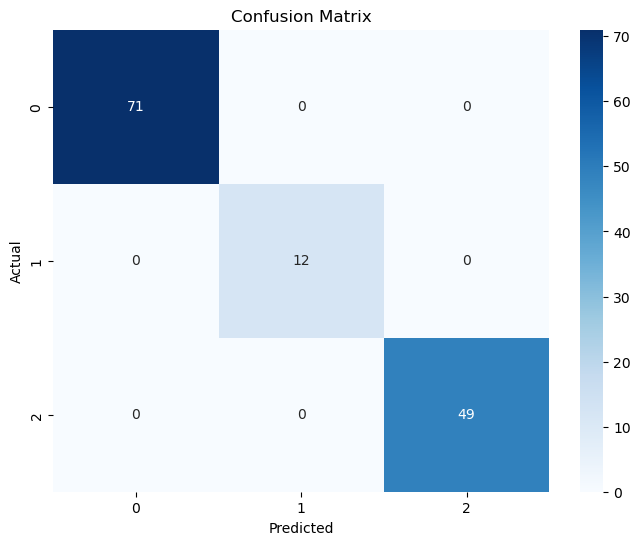

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming df is your dataframe
# Define your features and target variable
X_class = df[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Interaction_Online_Bank']]
y_class = df['GMM_Cluster']

# Split the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Initialize and train the SVC model
svc = SVC()
svc.fit(X_train_class, y_train_class)

# Predict the test set labels
y_pred_class = svc.predict(X_test_class)

# Print the classification report
print(classification_report(y_test_class, y_pred_class))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
# Regression: Predicting Avg_Credit_Limit using other features
X_reg = df[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Interaction_Online_Bank']]
y_reg = df['Avg_Credit_Limit']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)
print(f'Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}')


Mean Squared Error: 0.6599294587857338


Mean Squared Error: 0.6599294587857338


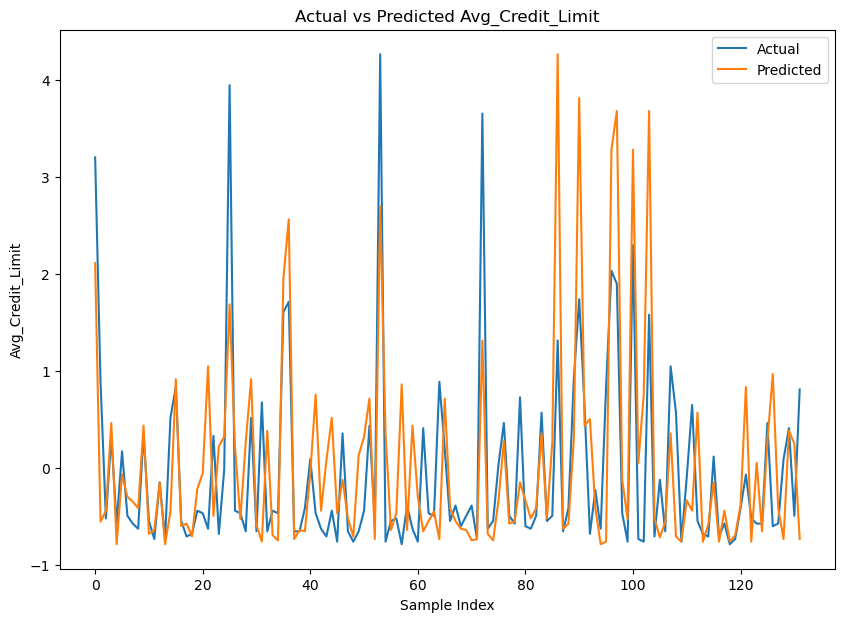

In [20]:
# Regression: Predicting Avg_Credit_Limit using other features
X_reg = df[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'Interaction_Online_Bank']]
y_reg = df['Avg_Credit_Limit']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)

y_pred_reg = reg.predict(X_test_reg)
print(f'Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg)}')

# Line Plot of actual vs predicted values
plt.figure(figsize=(10, 7))
plt.plot(y_test_reg.values, label='Actual')
plt.plot(y_pred_reg, label='Predicted')
plt.title('Actual vs Predicted Avg_Credit_Limit')
plt.xlabel('Sample Index')
plt.ylabel('Avg_Credit_Limit')
plt.legend()
plt.show()


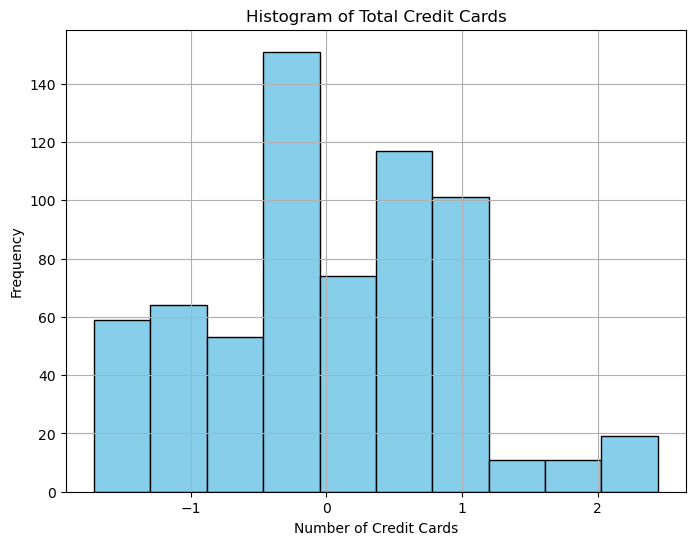

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(df['Total_Credit_Cards'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


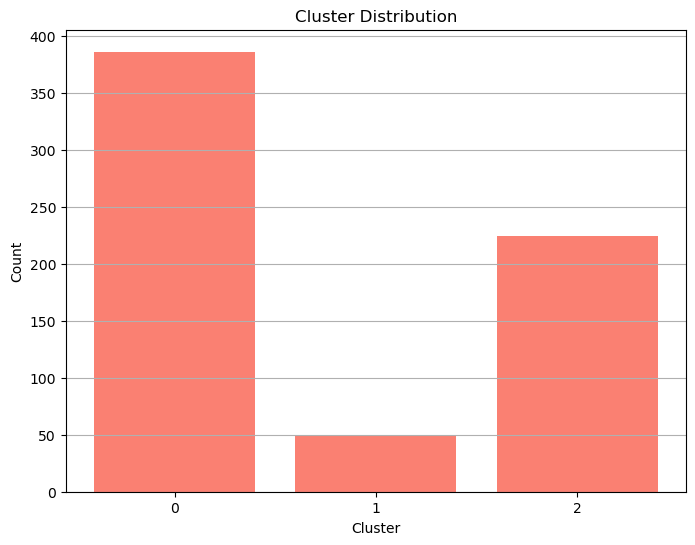

In [22]:
plt.figure(figsize=(8, 6))
cluster_counts = df['GMM_Cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values, color='salmon')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(cluster_counts.index)
plt.grid(axis='y')
plt.show()


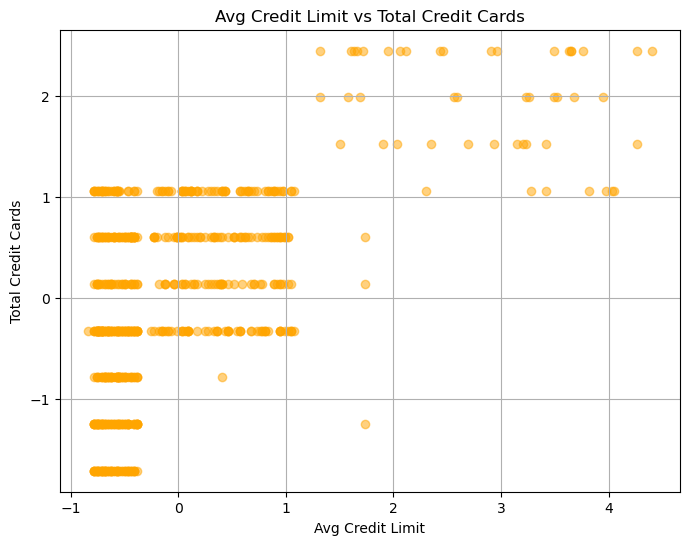

In [23]:
# Scatter plot for Avg_Credit_Limit vs Total_Credit_Cards
plt.figure(figsize=(8, 6))
plt.scatter(df['Avg_Credit_Limit'], df['Total_Credit_Cards'], color='orange', alpha=0.5)
plt.title('Avg Credit Limit vs Total Credit Cards')
plt.xlabel('Avg Credit Limit')
plt.ylabel('Total Credit Cards')
plt.grid(True)
plt.show()


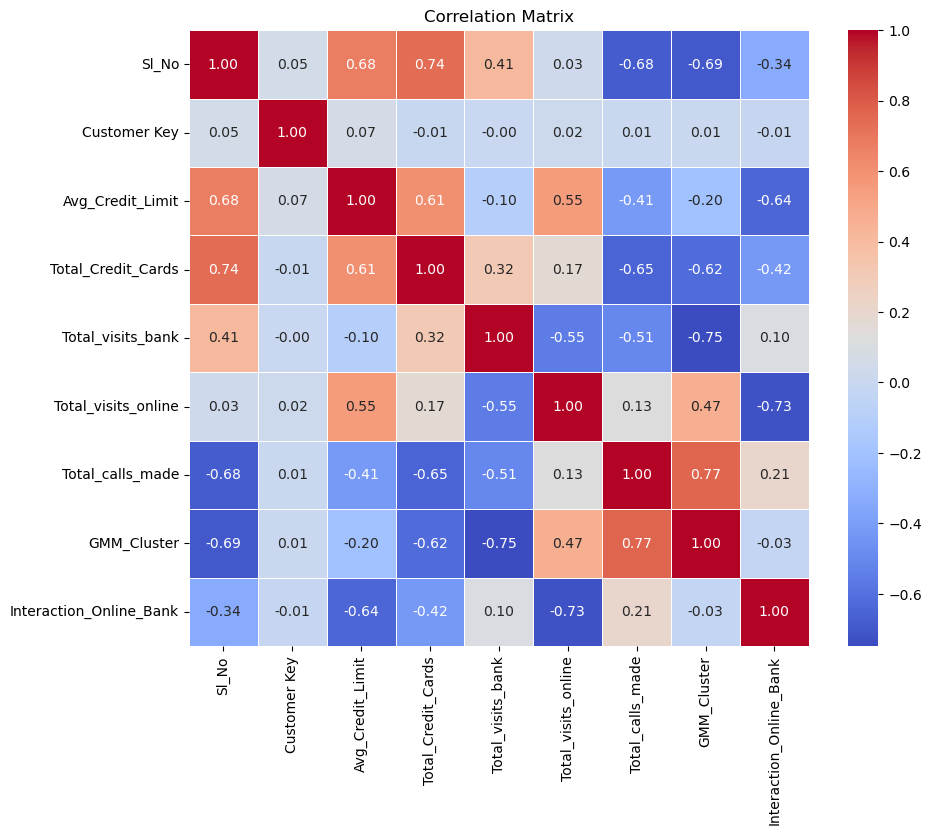

In [24]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
